In [1]:
# 1. Import required libraries and read the dataset.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

In [2]:
# reading dataset

Apps_data_df=pd.read_csv('Apps_data+(1).csv')

In [4]:
# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

Apps_data_df.head()

# we get 1st five samples of data using above code

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
Apps_data_df.shape

# to get shape

(10841, 13)

In [26]:
Apps_data_df.info()

# to get information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

Apps_data_df.describe()

# gives output of only numerical datatype columns

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
Apps_data_df.describe(include='object')

# this gives output of object datatype columns

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
# 4 4. Check if there are any duplicate records in the dataset? if any drop them.

Apps_data_df[Apps_data_df.duplicated()]

# below are the duplicate records in the data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [10]:
Apps_data_df.drop_duplicates(inplace=True)          # dropped duplicates

In [11]:
Apps_data_df.shape

(10358, 13)

In [12]:
# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

list(Apps_data_df.Category.unique())            # to get list of unique data in category column

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [13]:
Apps_data_df[Apps_data_df['Category']=='1.9']        # 1.9 is invalid category here, so we drop it using its index value.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
Apps_data_df.drop(index=10472,inplace=True)

In [15]:
Apps_data_df[Apps_data_df['Category']=='1.9']        # we can see here that there is no more 1.9 data in category column.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
Apps_data_df.shape

(10357, 13)

In [17]:
 # 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)
    
Apps_data_df.Rating.isna().sum()                           # to get count of null values


1465

In [18]:
Apps_data_df.dropna(subset=['Rating'],inplace=True)    # as there is 1465 null values in rating column, we drop that record

In [19]:
Apps_data_df.Rating.isna().sum()

0

In [20]:
Apps_data_df.shape

(8892, 13)

In [21]:
Apps_data_df['Rating_category']=Apps_data_df['Rating']

In [22]:
Apps_data_df['Rating_category'] = Apps_data_df['Rating_category'].apply(lambda x: "high" if x>3.5 else 'low')

# converted greater than 3.5 as high and less than 3.5 as low

In [23]:
Apps_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


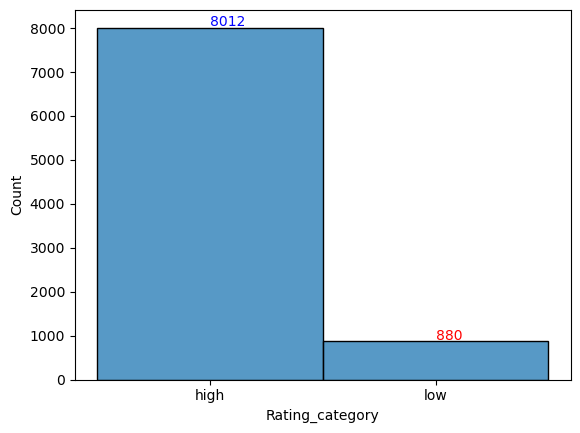

In [24]:
# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.
# plotted histplot of Rating category

sns.histplot(data=Apps_data_df,x='Rating_category')
plt.text(x=0,y=Apps_data_df.Rating_category.value_counts()[0]+30,s=Apps_data_df.Rating_category.value_counts()[0],color='b')
plt.text(x=1,y=Apps_data_df.Rating_category.value_counts()[1]+30,s=Apps_data_df.Rating_category.value_counts()[1],color='r')
plt.show()

In [25]:
# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

Apps_data_df['Reviews']=pd.to_numeric(Apps_data_df['Reviews'])      # converted to numeric datatype

In [26]:
Apps_data_df.Reviews.dtype

dtype('int64')

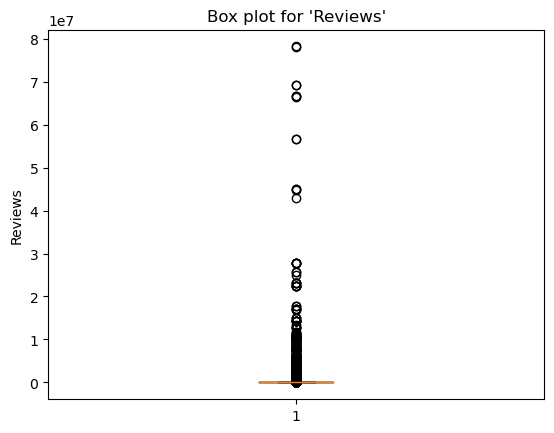

In [27]:
# plotted boxplot of Reviews

plt.boxplot(Apps_data_df['Reviews'])
plt.title('Box plot for \'Reviews\'')
plt.ylabel('Reviews')
plt.show()

In [28]:
from sklearn.preprocessing import FunctionTransformer         # imported function transformer from sklearn
log_transformer=FunctionTransformer(np.log1p)                 # tranformed data using log transformer
Apps_data_df['Reviews']=log_transformer.fit_transform(Apps_data_df['Reviews'])

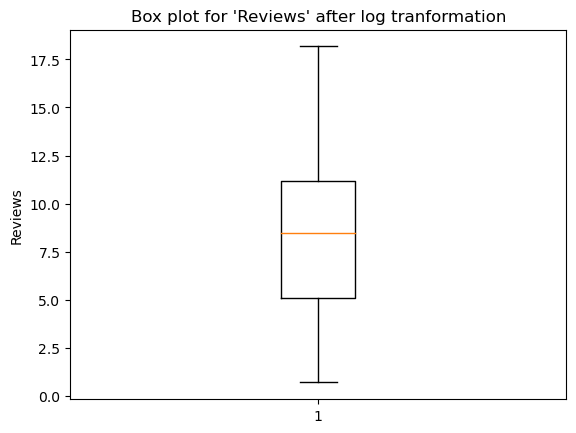

In [29]:
# plotted boxplot of Reviews after log transformation and we can see clearly that we handled outliers

plt.boxplot(Apps_data_df['Reviews'])
plt.title('Box plot for \'Reviews\' after log tranformation')
plt.ylabel('Reviews')
plt.show()

In [30]:
 # 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')
    
Apps_data_df.Size.unique()                                   # to get unique data of Size column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [31]:
Apps_data_df['Size']=Apps_data_df['Size'].apply(lambda x: x.replace('M','e6'))
Apps_data_df['Size']=Apps_data_df['Size'].apply(lambda x: x.replace('K','e3'))
Apps_data_df['Size']=Apps_data_df['Size'].apply(lambda x: x.replace('k','e3'))

# replaced M with e6, K and k with e3 using lambda function and .replace method

In [32]:
Apps_data_df.Size.head()

0     19e6
1     14e6
2    8.7e6
3     25e6
4    2.8e6
Name: Size, dtype: object

In [33]:
Apps_data_df[Apps_data_df['Size']=='Varies with device'].Size.count()

1468

In [34]:
Apps_data_df.drop(Apps_data_df[Apps_data_df['Size']=='Varies with device'].index,inplace=True) # dropped 1468 records  which contain s


In [35]:
Apps_data_df[Apps_data_df['Size']=='Varies with device'].Size.count()

0

In [36]:
Apps_data_df['Size']=pd.to_numeric(Apps_data_df['Size'])       # converted to numeric datatype

In [37]:
Apps_data_df.Size.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [38]:
Apps_data_df.Size.dtype

dtype('float64')

In [39]:
# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

Apps_data_df.Installs.unique()               # to get unique data of Installs column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [40]:
Apps_data_df['Installs']=Apps_data_df['Installs'].apply(lambda x: x.replace(',','').replace('+',''))

# replaced , + with empty using lambda function and .replace method

In [41]:
Apps_data_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [42]:
Apps_data_df['Installs']=pd.to_numeric(Apps_data_df['Installs'])         # converted to numeric data type

In [43]:
Apps_data_df['Installs'].dtype

dtype('int64')

In [44]:
# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

Apps_data_df.Price.unique()             # to get unique data of Installs column

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [45]:
Apps_data_df['Price']=Apps_data_df['Price'].apply(lambda x: x.replace('$',''))

# replaced $ with empty using lambda function and .replace method

In [46]:
Apps_data_df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [47]:
Apps_data_df['Price']=pd.to_numeric(Apps_data_df['Price'])              # converted to numeric datatype

In [48]:
Apps_data_df['Price'].dtype

dtype('float64')

In [49]:
# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

Apps_data_df.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

# dropped all unwanted columns for the analysis from the data

In [50]:
Apps_data_df.shape

(7424, 8)

In [51]:
Apps_data_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high


In [52]:
# 13. Encode the categorical columns.

from sklearn.preprocessing import LabelEncoder             # imported labelencoder from sklearn
le=LabelEncoder()

In [53]:
Apps_data_df['Category']=le.fit_transform(Apps_data_df['Category'])
Apps_data_df['Type']=le.fit_transform(Apps_data_df['Type'])
Apps_data_df['Content Rating']=le.fit_transform(Apps_data_df['Content Rating'])
Apps_data_df['Rating_category']=le.fit_transform(Apps_data_df['Rating_category'])

# encoded all categorical columns

In [54]:
Apps_data_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.075174,19000000.0,10000,0,0.0,1,0
1,0,6.875232,14000000.0,500000,0,0.0,1,0
2,0,11.379520,8700000.0,5000000,0,0.0,1,0
3,0,12.281389,25000000.0,50000000,0,0.0,4,0
4,0,6.875232,2800000.0,100000,0,0.0,1,0


In [55]:
# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

Y = Apps_data_df['Rating_category']
X = Apps_data_df.drop(['Rating_category'],axis=1)

In [56]:
Y.shape,X.shape

((7424,), (7424, 7))

In [57]:
# 15. Split the dataset into train and test.

from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [59]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5196, 7), (2228, 7), (5196,), (2228,))

In [60]:
# 16. Standardize the data, so that the values are within a particular range.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [61]:
X_train_Scaled = ss.fit_transform(X_train)
X_test_Scaled = ss.fit_transform(X_test)

In [62]:
type(X_train_Scaled),type(X_test_Scaled)

(numpy.ndarray, numpy.ndarray)

In [63]:
X_train_Scaled = pd.DataFrame(X_train_Scaled,columns=['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price','Content Rating'])

In [64]:
X_test_Scaled = pd.DataFrame(X_test_Scaled,columns=['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price','Content Rating'])

In [65]:
X_train_Scaled.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,-0.691627,-1.565607,-0.737260,-0.173681,-0.286442,-0.066131,-0.454717
1,-0.323483,-1.132046,0.358821,-0.173681,-0.286442,-0.066131,0.546431
2,0.535518,-0.249228,-0.326230,-0.171543,-0.286442,-0.066131,-0.454717
3,0.780946,1.047400,-0.369046,-0.152104,3.491105,0.063636,-0.454717
4,0.167374,-1.269655,-0.835737,-0.173595,-0.286442,-0.066131,-0.454717


In [66]:
X_test_Scaled.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,1.544250,-0.424430,-0.891438,-0.155820,-0.271542,-0.055829,-0.482925
1,1.913901,-0.162846,-0.777079,-0.155820,-0.271542,-0.055829,-0.482925
2,-0.673656,0.678608,1.056909,-0.136383,-0.271542,-0.055829,0.494329
3,0.681731,-0.039288,0.633355,-0.155820,-0.271542,-0.055829,-0.482925
4,0.435297,-1.820783,-0.510240,-0.157978,-0.271542,-0.055829,1.471583
